# Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective

* Explore and visualize the dataset.
* Build a linear regression model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.

# Data Dictionary 

* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.

import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations

import statsmodels.api as sm
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')

# import re

# 1. Exploring and Clearing Data

### Read the dataset

In [2]:
data = pd.read_csv('used_cars_data.csv') # Download data from used_cars_data.csv file

In [3]:
# pd.get_dummies(data)
# let us make another copy of data
df = data.copy()

### Understand the shape of the dataset

In [4]:
data.shape

(7253, 14)

* Dataset has 7253 rows and 14 columns.

### View the dataset

In [5]:
data.head() # Exploring initial 5 rows of the data set

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
data.sample(n=5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34


In [7]:
data.tail() # Exploring last 5 rows of the data set

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [8]:
# Some Columns are forseen first not to be needed: namely S.No. and New_Price (for new cars) as we are analyzing used cars

data.drop(['S.No.', 'New_Price'],axis=1,inplace=True) # inplace means no make copy
np.random.seed(1)
data.sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,6.34


### Check the data types and descriptions of the columns for the dataset

In [9]:
# Check the unique values in each column of the dataframe.
data.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
Price                1373
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


**Data Insights**
* Name - Convert to categorical
* Location - Convert to categorical
* Fuel_Type - Convert to categorical
* Transmission - Convert to categorical
* Owner_Type - Convert to categorical
* Seats - Convert to categorical

* Mileage - Remove Km/kg or kmpl units and convert to float64 (decimal places)
* Engine - Remove cc units and convert to int64 (no decimal places)
* Power - Remove bhp units and convert to float64 (decimal places)

### Converting variables to category

In [11]:
# Converting variables to categorical
data['Name'] = data.Name.astype('category')             
data['Location'] = data.Location.astype('category')  
data['Seats'] = data.Seats.astype('category')
data['Fuel_Type'] = data.Fuel_Type.astype('category')
data['Transmission'] = data.Transmission.astype('category')
data['Owner_Type'] = data.Owner_Type.astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(6), float64(1), int64(2), object(3)
memory usage: 486.9+ KB


### Converting variables to float

In [13]:
edit_cols = [] # define an empty list
for colname in data.columns[data.dtypes == 'object']:  # only need to consider string columns
    edit_cols.append(colname) # appends the column name to the edit_cols list
print(edit_cols)

['Mileage', 'Engine', 'Power']


In [14]:
def conversion(convert_val): # definition for eliminating units
    if isinstance(convert_val, str):  # checks if `convert_val` is a string
        multiplier = 1
        if convert_val.endswith('kmpl'):
            multiplier = 1
        elif convert_val.endswith('km/kg'):
            multiplier = 1
        elif convert_val.endswith('CC'):
            multiplier = 1
        elif convert_val.endswith('bhp'):
            multiplier = 1
            
        return convert_val.replace('kmpl', '').replace('km/kg', '').replace('CC', '').replace('bhp', '')* multiplier
    else: # this happens when the current value is np.nan
        return np.nan

for colname in edit_cols:
    data[colname] = data[colname].apply(conversion) # loop to execute removing units
    
# data['Power'] = data['Power'].replace("null", np.nan) # replace string 'nulls' in 'Power' column to NaN that can convert to float64
# data['Power'] = data['Power'].replace('null', '') 

In [15]:
data.loc[data["Power"] == "null "] # many null values in 'Power' column with string space that can prevent conversion to float64

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8,1248,null,5.0,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086,null,5.0,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086,null,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086,null,5.0,1.50
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.8,1248,null,5.0,2.50


In [16]:
data_obj = data.select_dtypes(['object'])
print (data_obj)

     Mileage Engine   Power
0      26.6    998   58.16 
1     19.67   1582   126.2 
2      18.2   1199    88.7 
3     20.77   1248   88.76 
4      15.2   1968   140.8 
...      ...    ...     ...
7248  20.54   1598   103.6 
7249  17.21   1197   103.6 
7250  23.08   1461    63.1 
7251   17.2   1197   103.6 
7252   10.0   2148     170 

[7253 rows x 3 columns]


In [17]:
data[data_obj.columns] = data_obj.apply(lambda x: x.str.strip()) # clearing empty string spaces around 'Power' column values
print (data)

                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage Engine  \

In [18]:
data.loc[data["Power"] == "null"] # spaces are stripped

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8,1248,null,5.0,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086,null,5.0,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086,null,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086,null,5.0,1.50
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.8,1248,null,5.0,2.50


In [19]:
data['Power'] = data['Power'].replace('null', '') # cut out null string values
data['Power'] = data['Power'].replace('', np.nan) # Fill up string space values with NaN

In [20]:
data.loc[data["Power"] == "null"] # no more null string values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [21]:
data.loc[data["Power"] == ""] # no more "" string values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [22]:
data_obj = data.select_dtypes(['object'])
data[data_obj.columns] = data_obj.apply(lambda x: x.str.strip()) # clearing empty string spaces around column values

In [23]:
# Conversion to float64 variables
data['Mileage'] = data.Mileage.astype('float64')            
data['Engine'] = data.Engine.astype('float64')    
data['Power'] = data.Power.astype('float64') 
# data['Power'] =pd.to_numeric(data['Power'], errors = 'coerce')

# np.random.seed(1)
# data.sample(n=10)

In [24]:
# Check the unique values in each column of the dataframe.
data.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   9
Price                1373
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(6), float64(4), int64(2)
memory usage: 486.9 KB


In [26]:
data.describe(include='all').T # quick summary .T transpose variables as rows

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616


# 2. Data Preprocessing and Analysis

### Check for and fix missing values

In [27]:
# looking at which columns have missing values
data.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(6), float64(4), int64(2)
memory usage: 486.9 KB


In [29]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = data.select_dtypes(include=np.number).columns.tolist() # make a list of variables with numerical values
print (numeric_columns)

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']


In [30]:
data[numeric_columns] = data[numeric_columns].apply(medianFiller,axis=0) # apply the lamda function on all the numeric columns for missing values

In [31]:
# looking at which columns have missing values
data.isnull().sum().sort_values(ascending=False)

Seats                53
Price                 0
Power                 0
Engine                0
Mileage               0
Owner_Type            0
Transmission          0
Fuel_Type             0
Kilometers_Driven     0
Year                  0
Location              0
Name                  0
dtype: int64

In [32]:
# remove the rows of data which have missing value(s)
data= data.dropna()

In [33]:
# looking at which columns have missing values
data.isnull().sum().sort_values(ascending=False)

Price                0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
Name                 0
dtype: int64

In [34]:
data.shape

(7200, 12)

***Insights***
* Missing values are numeric and filled with median (real) values or rows are removed where the numbers are small compared to the large data set
* 53 rows of empty Seat values are removed and it is not likely to affect the very large dataset

### Univariate Analysis - Check for Outliers

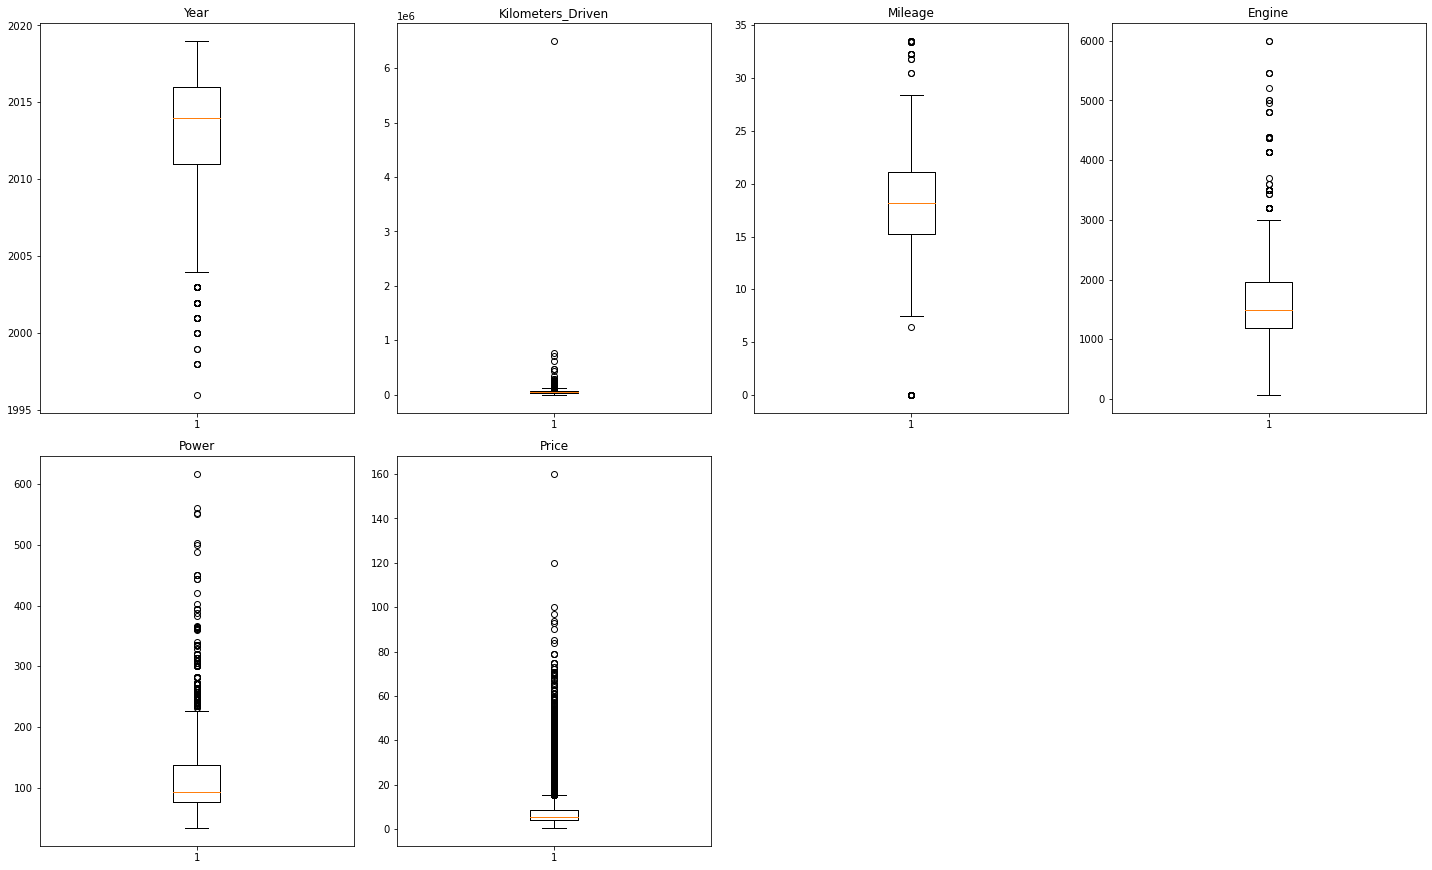

In [35]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns): # to create multiple boxplots for all the variables
                     plt.subplot(5,4,i+1) # 5 rows by 4 cols
                     plt.boxplot(data[variable],whis=1.5) # whis is equal to 1.5 to box in the non outliers
                     plt.tight_layout()
                     plt.title(variable) 

plt.show()

### Univariate Analysis - Distribution of Numeric Variables

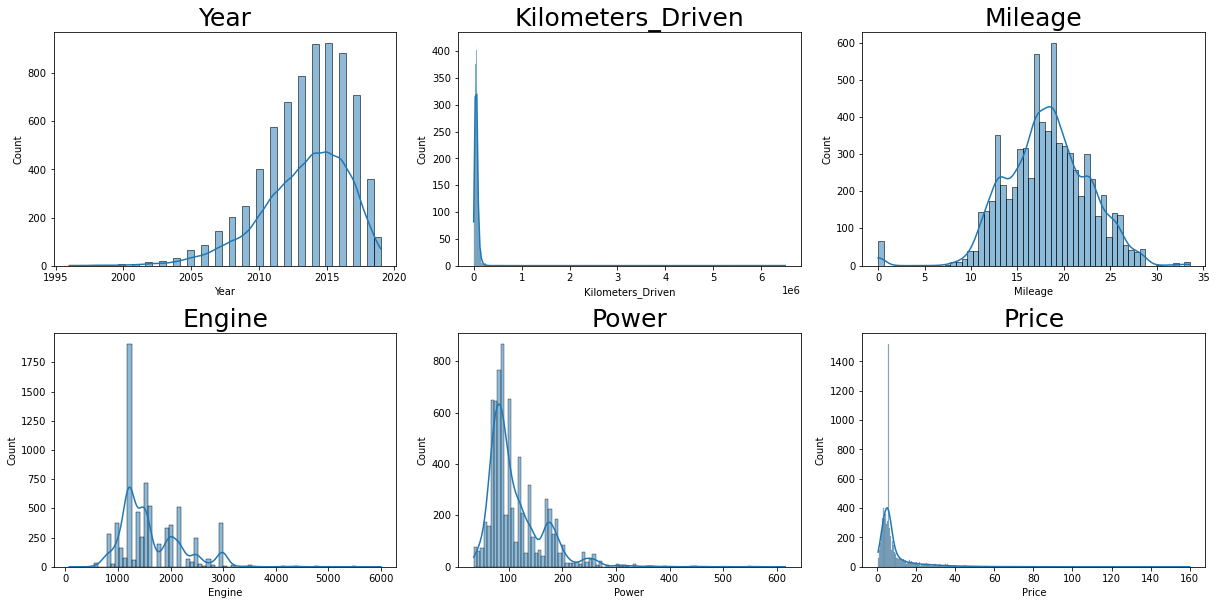

In [36]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    # plt.hist(data[all_col[i]])
    sns.histplot(data[all_col[i]], kde=True)   #you can comment the previous line and run this one to get distribution curves too
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

### Outliers Treatment

In [37]:
# Lets treat outliers by flooring and capping
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [38]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data,numerical_col)

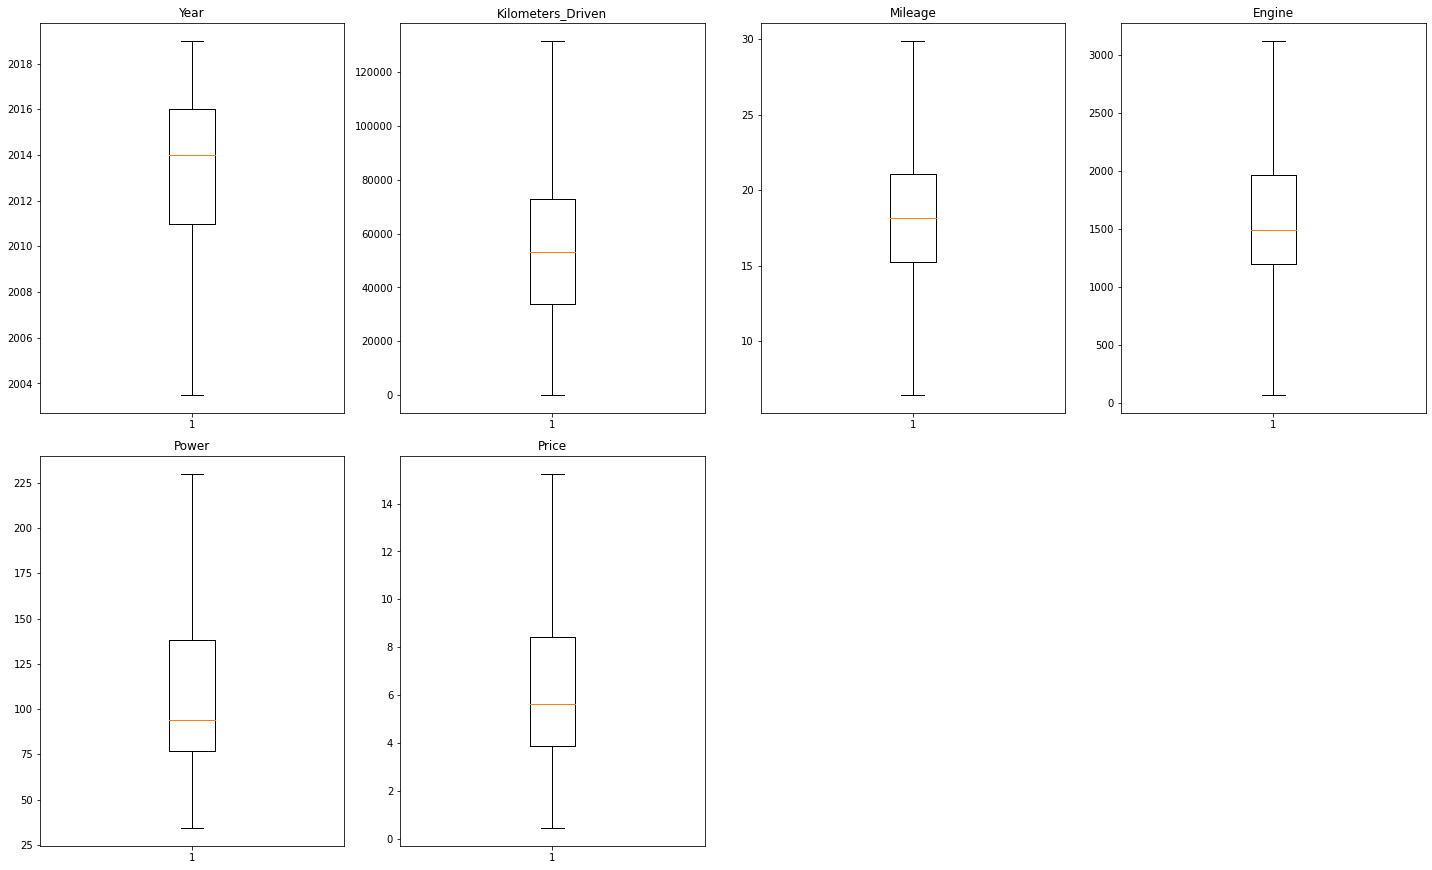

In [39]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns): # to create multiple boxplots for all the variables
                     plt.subplot(5,4,i+1) # 5 rows by 4 cols
                     plt.boxplot(data[variable],whis=1.5) # whis is equal to 1.5 to box in the non outliers
                     plt.tight_layout()
                     plt.title(variable) 

plt.show()

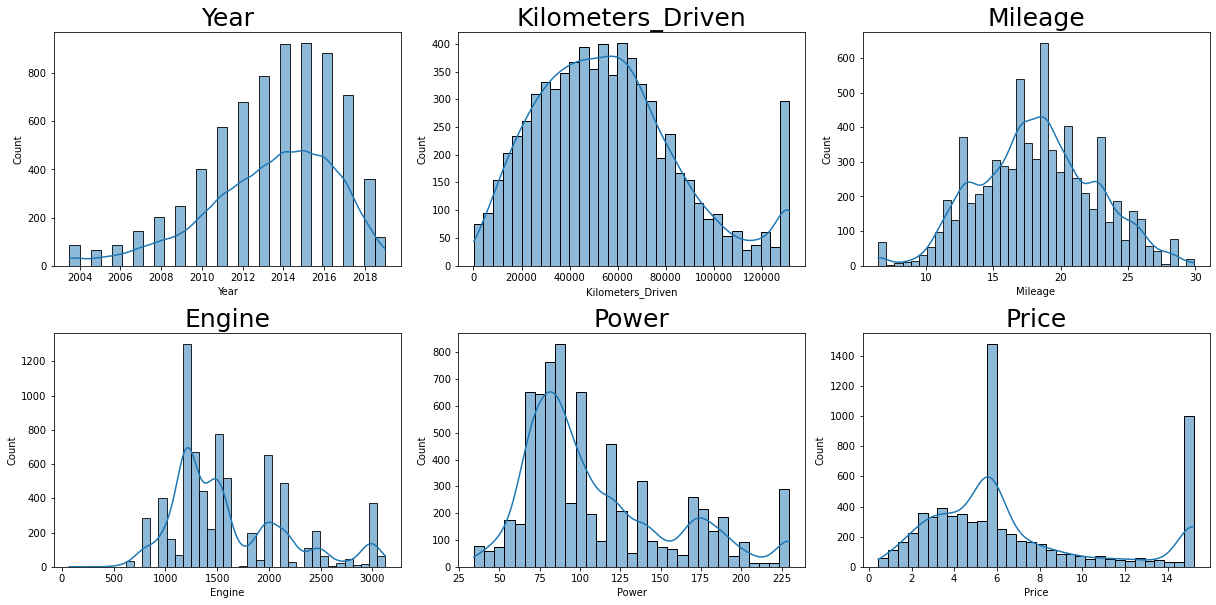

In [40]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    # plt.hist(data[all_col[i]])
    sns.histplot(data[all_col[i]], kde=True)   #you can comment the previous line and run this one to get distribution curves too
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

* Outliers has been treated after caping outliers to the extreme values of 1.5 IQR

In [41]:
data.describe(include=np.number).T # quick summary of numeric features , .T transpose variables as rows

,count,mean,std,min,25%,50%,75%,max
Year,7200.0,2013.406111,3.180914,2003.5000,2011.0000,2014.00,2016.00,2019.00000
Kilometers_Driven,7200.0,56201.105833,30180.267734,171.0000,34000.0000,53226.00,73000.00,131500.00000
Mileage,7200.0,18.237548,4.277550,6.4625,15.2450,18.19,21.10,29.88250
Engine,7200.0,1609.092500,565.320001,72.0000,1198.0000,1493.00,1968.00,3123.00000
Power,7200.0,110.534135,46.125092,34.2000,76.8000,94.00,138.03,229.87500
Price,7200.0,6.856619,4.213558,0.4400,3.8775,5.64,8.42,15.23375


### Univariate Analysis - Categorical Data

In [42]:
# Check the unique values in each column of the dataframe.
data.nunique()

Name                 2017
Location               11
Year                   17
Kilometers_Driven    3501
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               433
Engine                135
Power                 319
Seats                   9
Price                 885
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7200 non-null   category
 1   Location           7200 non-null   category
 2   Year               7200 non-null   float64 
 3   Kilometers_Driven  7200 non-null   int64   
 4   Fuel_Type          7200 non-null   category
 5   Transmission       7200 non-null   category
 6   Owner_Type         7200 non-null   category
 7   Mileage            7200 non-null   float64 
 8   Engine             7200 non-null   float64 
 9   Power              7200 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              7200 non-null   float64 
dtypes: category(6), float64(5), int64(1)
memory usage: 540.2 KB


In [44]:
data['Year'] = data.Year.astype('int64')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7200 non-null   category
 1   Location           7200 non-null   category
 2   Year               7200 non-null   int64   
 3   Kilometers_Driven  7200 non-null   int64   
 4   Fuel_Type          7200 non-null   category
 5   Transmission       7200 non-null   category
 6   Owner_Type         7200 non-null   category
 7   Mileage            7200 non-null   float64 
 8   Engine             7200 non-null   float64 
 9   Power              7200 non-null   float64 
 10  Seats              7200 non-null   category
 11  Price              7200 non-null   float64 
dtypes: category(6), float64(4), int64(2)
memory usage: 540.2 KB


***Observations & Insights***
* Name variable is categorical but with a unique variable basket of 2005 unique values, this has to be reduced to the car model name to just the brand name will be more efficient

In [46]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

***Location***

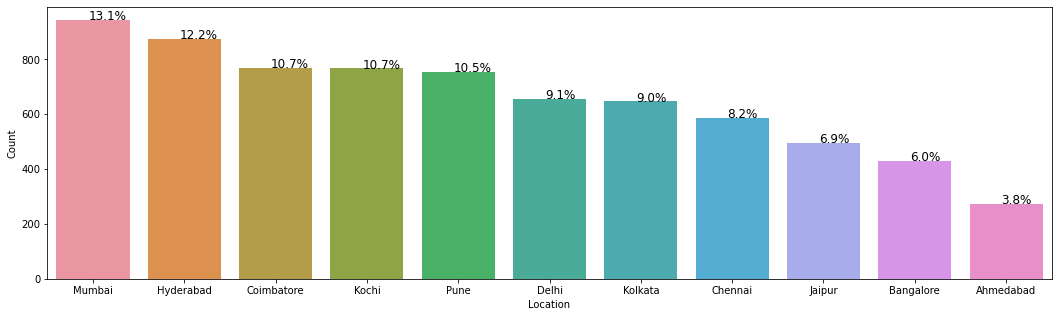

In [47]:
# Location Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Location"], order = data["Location"].value_counts().index) # Plot histogram
plt.xlabel('Location')
plt.ylabel('Count')
perc_on_bar(ax,data["Location"])

***Observations***
* Top 3 locations of used cars are from Mumbai, Hyderabad, Coimbatore / Kochi; constituting ~ 47% of the used cars under analysis

***Fuel_Type***

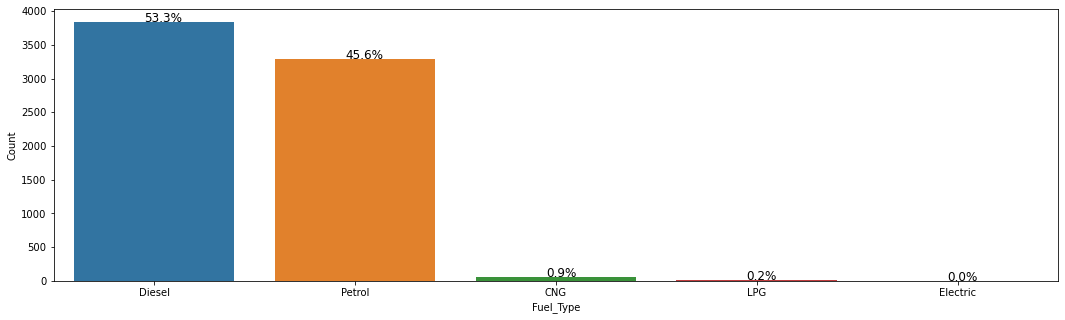

In [48]:
# Fuel_Type Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Fuel_Type"], order = data["Fuel_Type"].value_counts().index) # Plot histogram
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
perc_on_bar(ax,data["Fuel_Type"])

In [49]:
# Cut out observations that are too small to be significant
array = ['Diesel', 'Petrol']
data = data.loc[data['Fuel_Type'].isin(array)]

In [50]:
data['Fuel_Type'].value_counts(dropna=False)

Diesel      3838
Petrol      3286
LPG            0
Electric       0
CNG            0
Name: Fuel_Type, dtype: int64

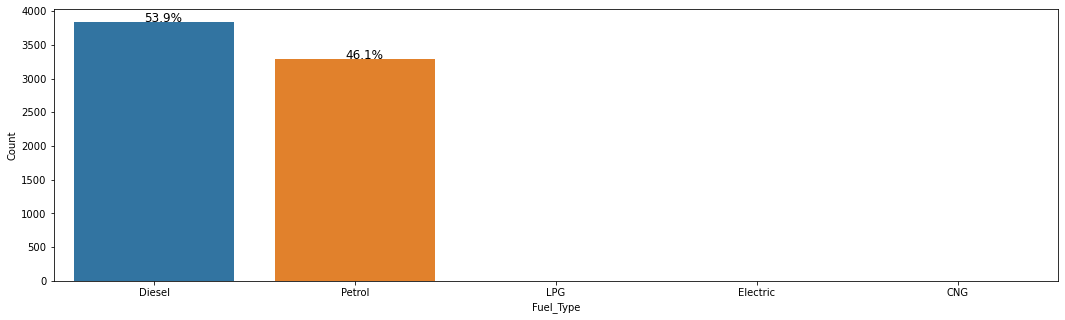

In [51]:
# Fuel_Type Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Fuel_Type"], order = data["Fuel_Type"].value_counts().index) # Plot histogram
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
perc_on_bar(ax,data["Fuel_Type"])

***Observations & Insights***
* As expected, vast majority of these used cars are either diesel or petrol types
* Other fuel types are very small in number and removed for analysis efficiency

***Transmission***

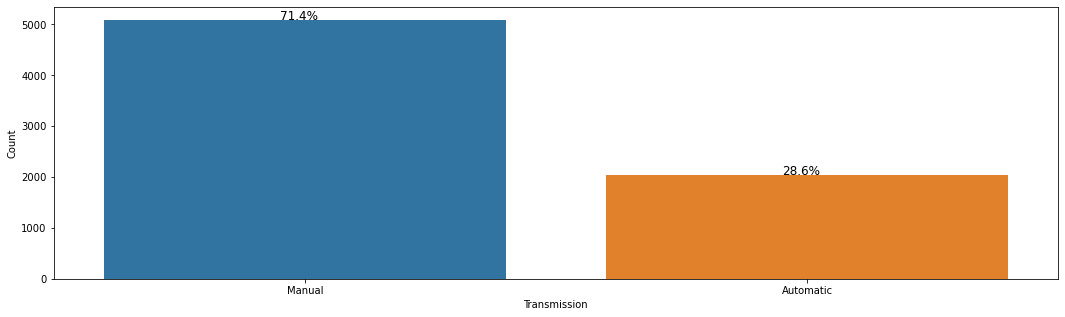

In [52]:
# Transmission Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Transmission"], order = data["Transmission"].value_counts().index) # Plot histogram
plt.xlabel('Transmission')
plt.ylabel('Count')
perc_on_bar(ax,data["Transmission"])

***Observations***
* 30% of used cars under analysis are auto while the rest are manual

***Owner_Type***

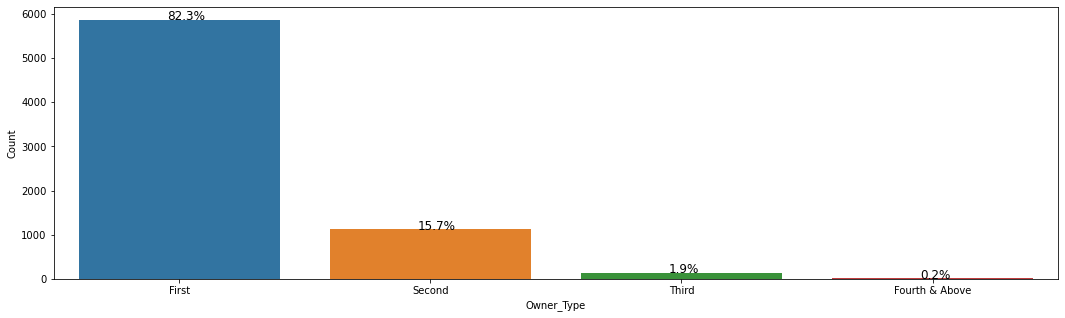

In [53]:
# Owner_Type Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Owner_Type"], order = data["Owner_Type"].value_counts().index) # Plot histogram
plt.xlabel('Owner_Type')
plt.ylabel('Count')
perc_on_bar(ax,data["Owner_Type"])

In [54]:
# Cut out observations that are too small to be significant
array = ['First', 'Second']
data = data.loc[data['Owner_Type'].isin(array)]

In [55]:
data['Owner_Type'].value_counts(dropna=False)

First             5861
Second            1119
Third                0
Fourth & Above       0
Name: Owner_Type, dtype: int64

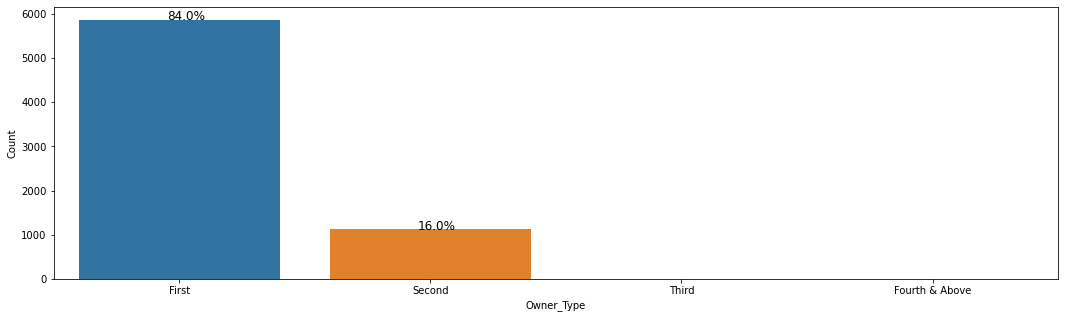

In [56]:
# Owner_Type Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Owner_Type"], order = data["Owner_Type"].value_counts().index) # Plot histogram
plt.xlabel('Owner_Type')
plt.ylabel('Count')
perc_on_bar(ax,data["Owner_Type"])

***Observations & Insights***
* A vast majority of used cars under analysis in the market are only owned once at ~ 82% out of the whole data set
* More than 2 owners used cars are very small in number and removed for analysis efficiency 

***Seats***

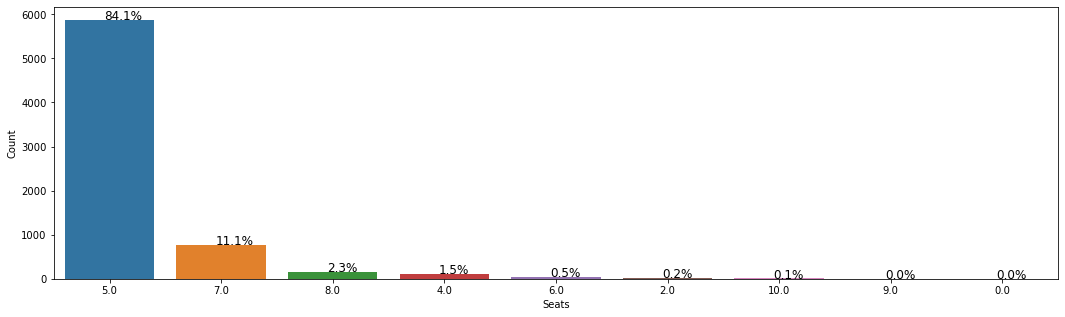

In [57]:
# Seats Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Seats"], order = data["Seats"].value_counts().index) # Plot histogram
plt.xlabel('Seats')
plt.ylabel('Count')
perc_on_bar(ax,data["Seats"])

In [58]:
data['Seats'].value_counts(dropna=False)

5.0     5872
7.0      777
8.0      160
4.0      106
6.0       37
2.0       17
10.0       7
9.0        3
0.0        1
Name: Seats, dtype: int64

In [59]:
# Cut out observations that are too small to be significant
data = data[data.Seats != 0]
data = data[data.Seats != 9]
data = data[data.Seats != 10]
data = data[data.Seats != 2]
data = data[data.Seats != 6]

In [60]:
data['Seats'].value_counts(dropna=False)

5.0     5872
7.0      777
8.0      160
4.0      106
10.0       0
9.0        0
6.0        0
2.0        0
0.0        0
Name: Seats, dtype: int64

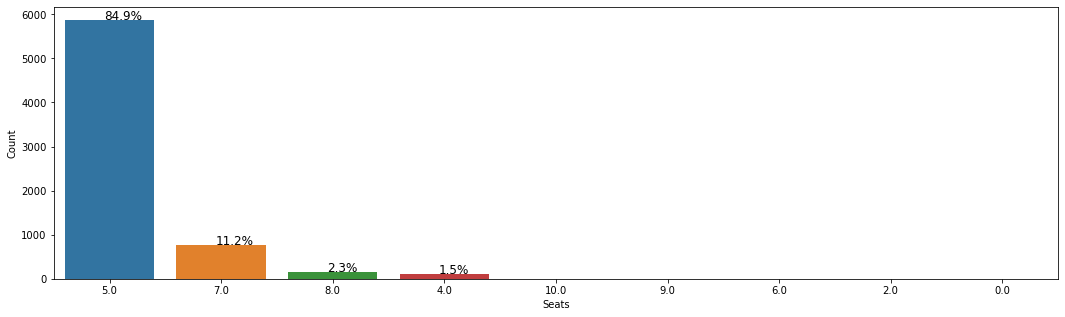

In [61]:
# Seats Analysis
plt.figure(figsize=(18,5))
ax = sns.countplot(data["Seats"], order = data["Seats"].value_counts().index) # Plot histogram
plt.xlabel('Seats')
plt.ylabel('Count')
perc_on_bar(ax,data["Seats"])

***Observations & Insights***
* A vast majority of used cars under analysis in the market are 4,5,7,8 seaters
* Other seaters are removed for analysis efficieny 

***Name***

In [62]:
# Extract Brand Name from name Column
def model_to_brand(name_val):
    """For each value, take the number before the ' '
    unless it is not a string value.
    """
    if isinstance(name_val, str):
        return (name_val.split(' ')[0])
    
data['Name'] = data['Name'].apply(model_to_brand) 

In [63]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50000
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50000
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00000
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,15.23375
6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50000


In [64]:
np.random.seed(1)
data.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7073,Hyundai,Jaipur,2014,62269,Diesel,Manual,First,24.00,1120.0,70.000,5.0,5.64000
1351,Maruti,Kochi,2015,44620,Petrol,Manual,First,20.73,1373.0,91.100,5.0,6.93000
1900,Audi,Coimbatore,2012,46913,Diesel,Automatic,First,14.94,2967.0,229.875,5.0,15.23375
1964,Maruti,Hyderabad,2006,71993,Petrol,Manual,First,19.70,796.0,46.300,5.0,1.80000
2126,Toyota,Pune,2007,131500,Diesel,Manual,Second,12.80,2494.0,102.000,8.0,5.70000
1023,Hyundai,Bangalore,2014,67000,Diesel,Manual,First,23.00,1396.0,90.000,5.0,5.50000
6394,Maruti,Delhi,2014,51200,Petrol,Manual,First,15.10,1196.0,73.000,5.0,5.64000
1968,Toyota,Kochi,2018,37713,Diesel,Automatic,Second,12.55,2982.0,168.500,7.0,15.23375
4069,BMW,Coimbatore,2014,60280,Diesel,Automatic,First,22.48,1995.0,190.000,5.0,15.23375
2761,Skoda,Delhi,2014,38000,Petrol,Automatic,First,13.70,1798.0,157.750,5.0,11.60000


In [65]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7247,Hyundai,Coimbatore,2015,21190,Petrol,Manual,First,21.10,814.0,55.2,5.0,5.64
7248,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,5.64
7249,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,5.64
7250,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,5.64
7252,Mercedes-Benz,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,5.64


In [66]:
# Check the unique values in each column of the dataframe.
data.nunique()

Name                   30
Location               11
Year                   17
Kilometers_Driven    3403
Fuel_Type               2
Transmission            2
Owner_Type              2
Mileage               418
Engine                127
Power                 303
Seats                   4
Price                 877
dtype: int64

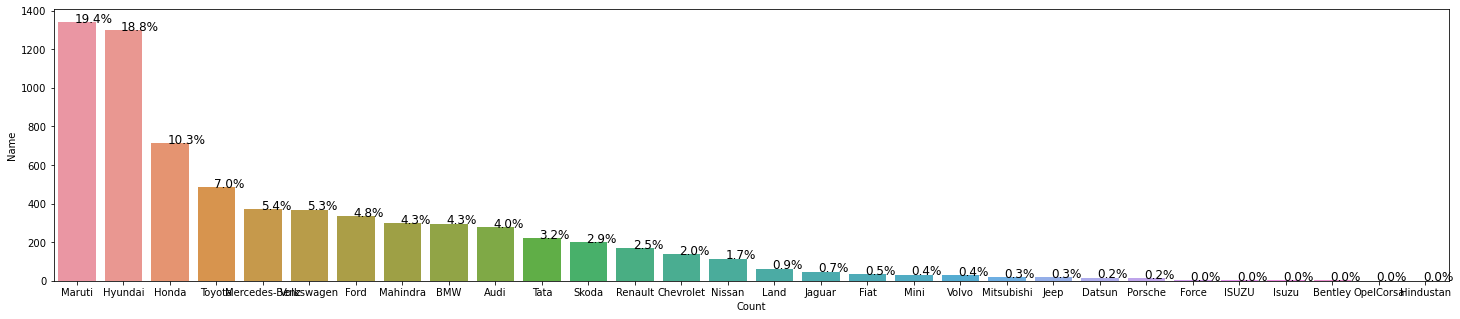

In [67]:
# Name Analysis
plt.figure(figsize=(25,5))
ax = sns.countplot(data["Name"], order = data["Name"].value_counts().index) # Plot histogram
plt.xlabel('Count')
plt.ylabel('Name')
perc_on_bar(ax,data["Name"])

***Observations***
* The most popular car names on the market are Maruti, Hyundai, Honda and Toyota 

In [68]:
data['Name'].value_counts(dropna=False) # list NaN as well

Maruti           1341
Hyundai          1299
Honda             714
Toyota            485
Mercedes-Benz     371
Volkswagen        368
Ford              335
Mahindra          298
BMW               296
Audi              279
Tata              221
Skoda             200
Renault           170
Chevrolet         139
Nissan            115
Land               63
Jaguar             47
Fiat               33
Mini               31
Volvo              28
Mitsubishi         19
Jeep               19
Datsun             17
Porsche            15
Force               3
ISUZU               3
Isuzu               2
Bentley             2
OpelCorsa           1
Hindustan           1
Name: Name, dtype: int64

In [69]:
data['Name'] = data['Name'].replace('ISUZU', 'Isuzu') # treat duplicate

In [70]:
data['Name'].value_counts(dropna=False) # list NaN as well

Maruti           1341
Hyundai          1299
Honda             714
Toyota            485
Mercedes-Benz     371
Volkswagen        368
Ford              335
Mahindra          298
BMW               296
Audi              279
Tata              221
Skoda             200
Renault           170
Chevrolet         139
Nissan            115
Land               63
Jaguar             47
Fiat               33
Mini               31
Volvo              28
Jeep               19
Mitsubishi         19
Datsun             17
Porsche            15
Isuzu               5
Force               3
Bentley             2
OpelCorsa           1
Hindustan           1
Name: Name, dtype: int64

In [71]:
# Convert back to category again as the extraction made it back to object string type
data['Name'] = data.Name.astype('category')

***Observations & Insights***
* The most popular car brands are Maruti, Hyundai, Honda and Toyota

### Bivariate Analysis

***HeatMap Analysis***

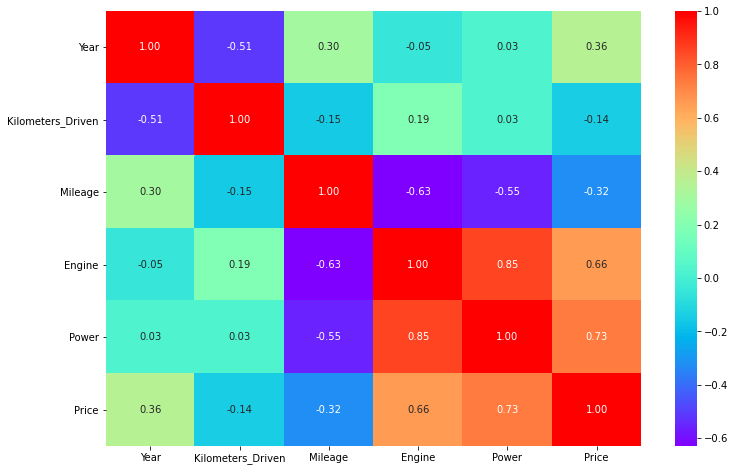

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

***Observations & Insights***
* Price is observed to have higher correlation values to Engine and Power. It is safe to conclude price is moderately sensitive for both Engine and Power among numeric specifications of used cars
* Engine and Power are highly correlated to each other
* Mileage is somewhat negatively correlated to Engine and Power, more so for Engine

***Pairplot Analysis***

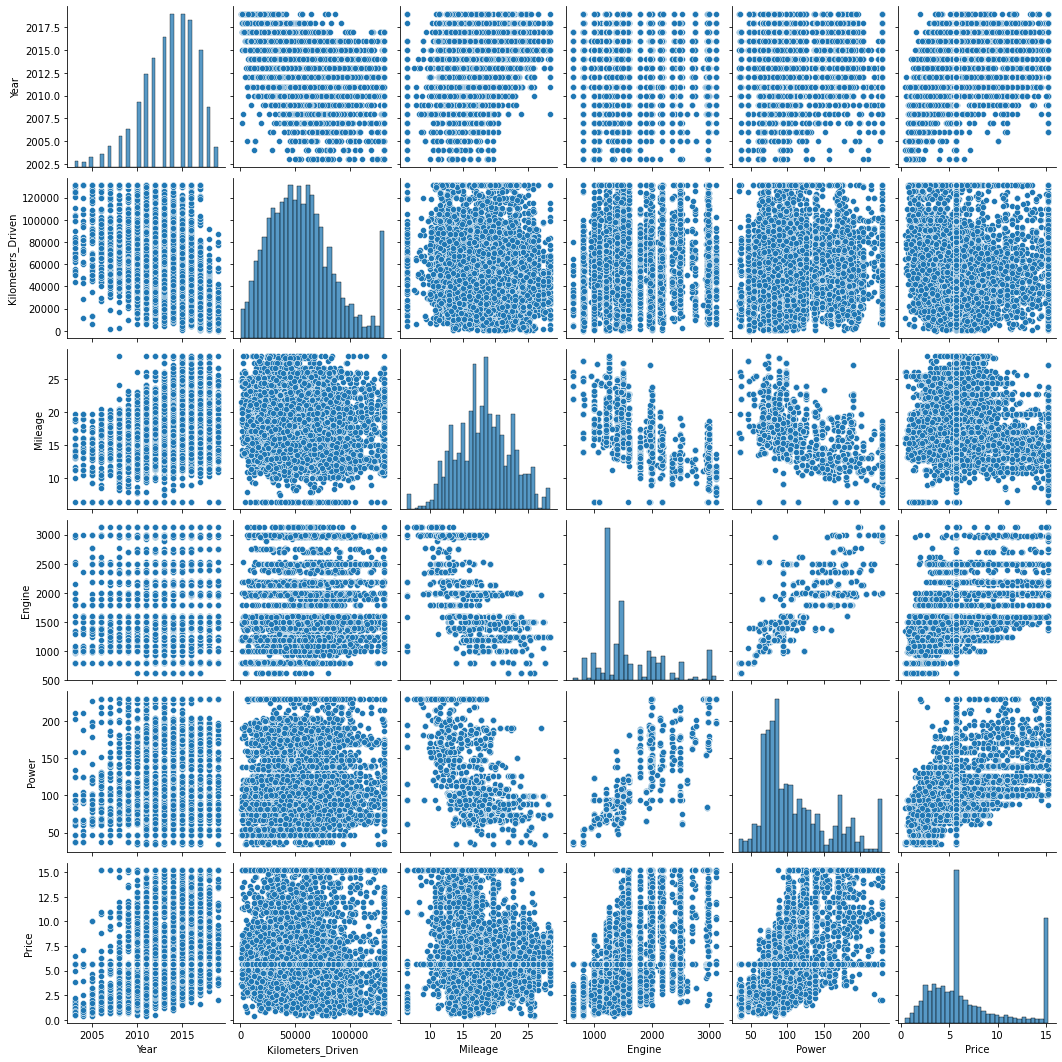

In [73]:
sns.pairplot(data)
plt.show()

***Observations & Insights***
* Engine and Power are almost positively linear correlated
* Both Engine and Power are somewhat negatively correlated to Mileage

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 1 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6915 non-null   category
 1   Location           6915 non-null   category
 2   Year               6915 non-null   int64   
 3   Kilometers_Driven  6915 non-null   int64   
 4   Fuel_Type          6915 non-null   category
 5   Transmission       6915 non-null   category
 6   Owner_Type         6915 non-null   category
 7   Mileage            6915 non-null   float64 
 8   Engine             6915 non-null   float64 
 9   Power              6915 non-null   float64 
 10  Seats              6915 non-null   category
 11  Price              6915 non-null   float64 
dtypes: category(6), float64(4), int64(2)
memory usage: 741.4 KB


***Price vs Name***

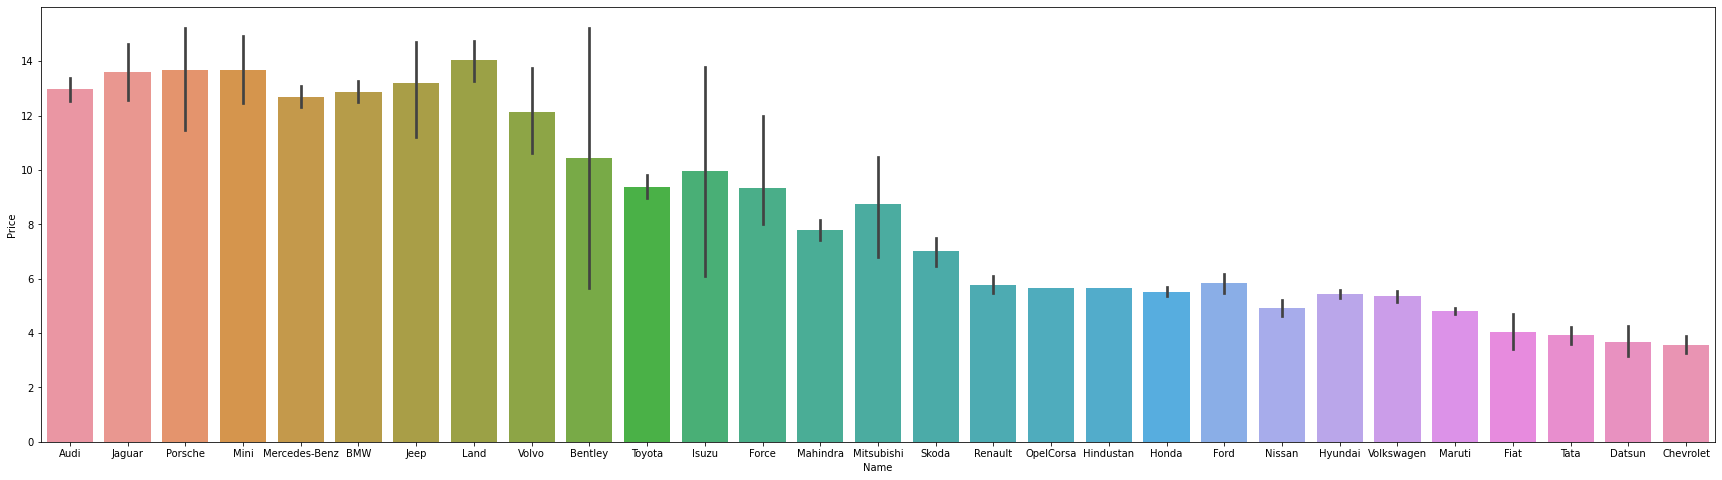

In [75]:
result = data.groupby(["Name"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(30,8))  # setting the figure size
sns.barplot(x='Name',y="Price", data=data, order=result['Name'])
plt.show()

***Observations***
* European luxury brand names fetched highest prices followed by Japanese, American and budget European brands. Local Indian brands are on the lower spectrum of prices  

***Price vs Location***

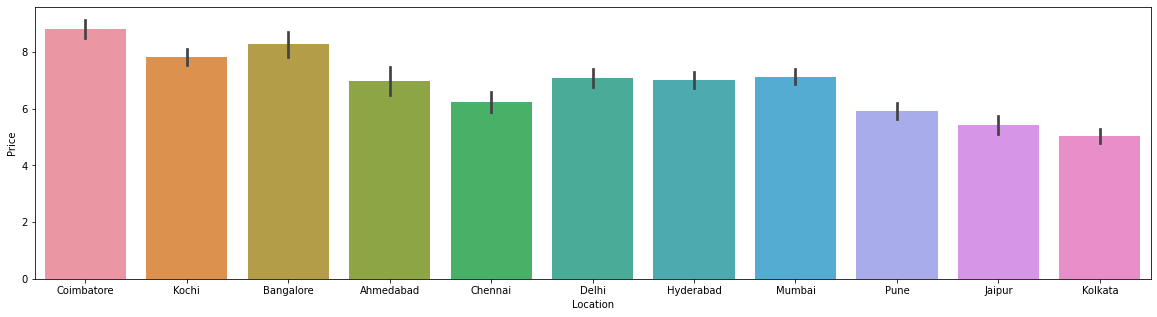

In [76]:
result = data.groupby(["Location"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(20,5))  # setting the figure size
sns.barplot(x='Location',y="Price", data=data, order=result['Location'])
plt.show()

***Observations***
* The places that used cars can fetched on average highest prices are Coimbatore, Bangalore, Kochi and Hyderabad. These can be target markets to sell

***Price vs Year***

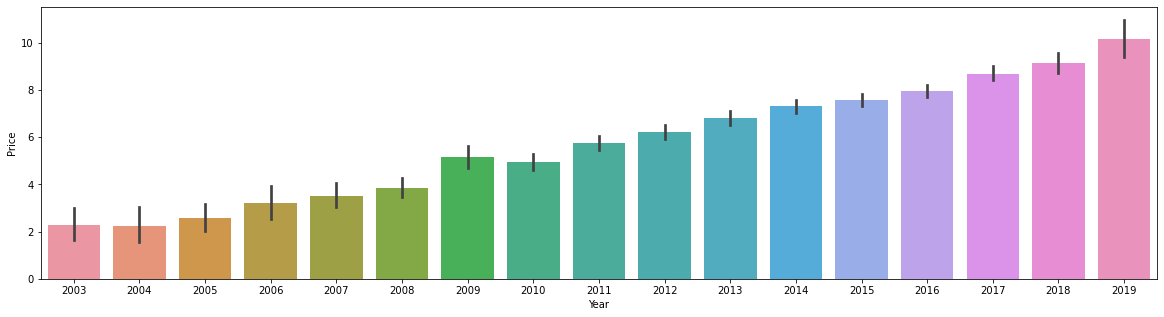

In [77]:
plt.figure(figsize=(20,5))  # setting the figure size
sns.barplot(x='Year',y="Price", data=data)
plt.show()

***Observations***
* As expected, the prices for used cars tended to be higher when the car manufacture date is more recent. Newer models are better for targeting 

***Price vs Fuel_Type***

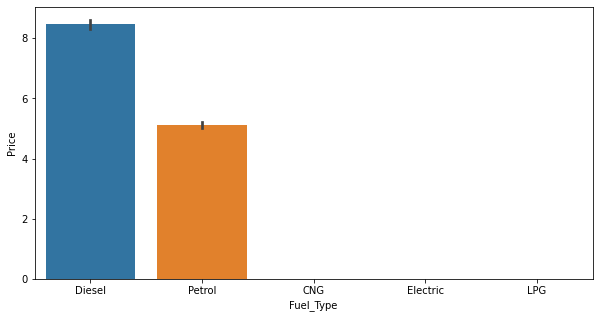

In [78]:
result = data.groupby(["Fuel_Type"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(10,5))  # setting the figure size
sns.barplot(x='Fuel_Type',y="Price", data=data, order=result['Fuel_Type'])
plt.show()

***Observations***
* Diesel Cars priced more than petrol cars among used cars. Diesel cars can fetch more revenue therefore good for targeting 

***Price vs Transmission***

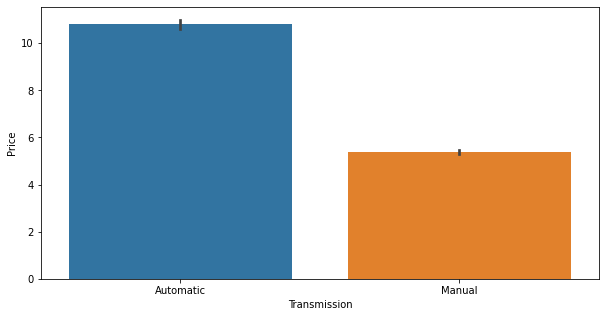

In [79]:
plt.figure(figsize=(10,5))  # setting the figure size
sns.barplot(x='Transmission',y="Price", data=data)
plt.show()

***Observations***
* Automatic cars fetched more than manual cars and should be focused on

***Price vs Owner_Type***

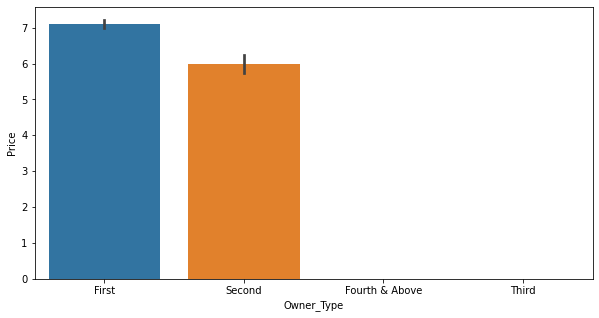

In [80]:
result = data.groupby(["Owner_Type"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(10,5))  # setting the figure size
sns.barplot(x='Owner_Type',y="Price", data=data, order=result['Owner_Type'])
plt.show()

***Observations***
* The price of cars dropped as the used cars experienced more owners before potential buyer

***Price vs Seats***

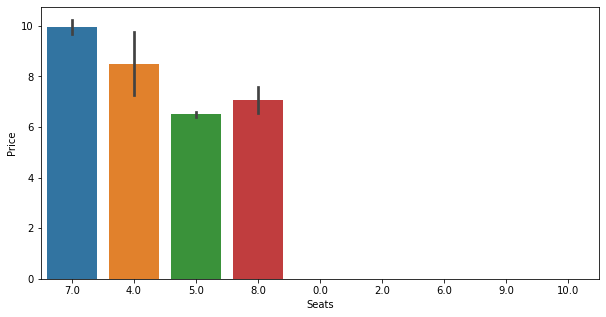

In [81]:
result = data.groupby(["Seats"])['Price'].aggregate(np.median).reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(10,5))  # setting the figure size
sns.barplot(x='Seats',y="Price", data=data, order=result['Seats'])
plt.show()

***Observations***
* The prices of 7 seaters fetched the highest prices followed by 4 seaters

#### Dummy variables for categorical variables will be created in the model building segment

# 3. Feature Engineering

To reduce dimensionality of the dataset, 2 steps has been taken in parallel to doing basic data analysis
* Dropping 'S.No' and 'New_Price' columns: S.No column values that are duplicate of the dataframe index numbers in Python so it should be removed. New_Price column values are for the car model that is new but since we are conducting used car analysis, it is thus removed


* Reducing the unique values of 'Name' column: The name column values contain the car brand and model names as well as other identifiers that made the column have high number of unique values. The number is reduced from 2005 to 32 by only considering the car brand name instead

In [82]:
data['Name'].value_counts()

Maruti           1341
Hyundai          1299
Honda             714
Toyota            485
Mercedes-Benz     371
Volkswagen        368
Ford              335
Mahindra          298
BMW               296
Audi              279
Tata              221
Skoda             200
Renault           170
Chevrolet         139
Nissan            115
Land               63
Jaguar             47
Fiat               33
Mini               31
Volvo              28
Jeep               19
Mitsubishi         19
Datsun             17
Porsche            15
Isuzu               5
Force               3
Bentley             2
Hindustan           1
OpelCorsa           1
Name: Name, dtype: int64

# 4. Model Building

### Define X and Y Data Sets

In [83]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50000
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50000
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00000
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,15.23375
6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50000


In [84]:
#Defining X and y variables
X = data.drop(['Price'], axis=1)
y = data[['Price']]

print(X.head())
print(y.head())

      Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   
6   Nissan      Jaipur  2013              86999    Diesel       Manual   

  Owner_Type  Mileage  Engine   Power Seats  
1      First    19.67  1582.0  126.20   5.0  
2      First    18.20  1199.0   88.70   5.0  
3      First    20.77  1248.0   88.76   7.0  
4     Second    15.20  1968.0  140.80   5.0  
6      First    23.08  1461.0   63.10   5.0  
      Price
1  12.50000
2   4.50000
3   6.00000
4  15.23375
6   3.50000


In [85]:
print(X.shape)
print(y.shape)

(6915, 11)
(6915, 1)


### Create Dummy Variables

* Dummy variables are required for categorical variables to be accepted in supervised machine learning models

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 1 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6915 non-null   category
 1   Location           6915 non-null   category
 2   Year               6915 non-null   int64   
 3   Kilometers_Driven  6915 non-null   int64   
 4   Fuel_Type          6915 non-null   category
 5   Transmission       6915 non-null   category
 6   Owner_Type         6915 non-null   category
 7   Mileage            6915 non-null   float64 
 8   Engine             6915 non-null   float64 
 9   Power              6915 non-null   float64 
 10  Seats              6915 non-null   category
dtypes: category(6), float64(3), int64(2)
memory usage: 687.4 KB


In [87]:
X = pd.get_dummies(X, columns=['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], drop_first=True)

In [88]:
X.drop(['Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Diesel', 'Owner_Type_Fourth & Above', 'Owner_Type_Third', 'Seats_2.0', 'Seats_4.0', 'Seats_6.0', 'Seats_9.0', 'Seats_10.0'],axis=1,inplace=True) # inplace means no make copy
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Hindustan,Name_Honda,Name_Hyundai,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_OpelCorsa,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Seats_5.0,Seats_7.0,Seats_8.0
1,2015,41000,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,2011,46000,18.20,1199.0,88.70,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,2012,87000,20.77,1248.0,88.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2013,40670,15.20,1968.0,140.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
6,2013,86999,23.08,1461.0,63.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


### Split Data Sets into Train and Test Sets

In [89]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Hindustan,Name_Honda,Name_Hyundai,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_OpelCorsa,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Seats_5.0,Seats_7.0,Seats_8.0
4188,2016,86000,25.47,1248.0,88.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
5796,2016,27000,18.78,999.0,74.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
6289,2009,131500,11.68,2498.0,112.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
3799,2014,30000,14.21,2143.0,203.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5183,2013,38622,17.40,1497.0,117.3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0


# 5. Choose Model, Train and Evaluate

### Choose and Train Model

In [91]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test) 

Intercept of the linear equation: [-853.2571355]

Coefficients of the equation are: [[ 4.28480049e-01 -7.51547580e-06 -9.49036281e-02  3.96818317e-04
   2.96929323e-02 -6.24575048e-02  3.10216048e+00 -3.61671425e+00
  -4.06500565e+00 -3.58377148e+00  1.40479772e-01 -3.07525316e+00
   8.19706329e-01 -2.86446718e+00 -2.67336226e+00 -4.36905240e+00
  -3.15787232e-01  1.90744577e-01  3.76043450e-01 -2.99322435e+00
  -2.65856918e+00  3.07943450e-02  1.13438338e+00 -2.98781292e+00
  -3.17060965e+00  1.13887495e+00 -1.55614955e+00 -2.97368173e+00
  -2.36648618e+00 -4.23811557e+00 -1.00330879e+00 -3.19544190e+00
  -1.38076234e+00  1.32065200e-01 -5.82019634e-02  2.09166931e-01
  -4.79066126e-01  2.24650917e-01 -1.86915317e-01 -2.61128781e-01
  -1.04678914e+00 -3.33983682e-01 -1.69524990e-01 -1.25491691e+00
  -6.72986985e-01 -2.58369651e-01 -8.23368787e-01 -1.22453704e-01
  -1.09765460e+00]]


In [92]:
list(X.columns)

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Name_BMW',
 'Name_Bentley',
 'Name_Chevrolet',
 'Name_Datsun',
 'Name_Fiat',
 'Name_Force',
 'Name_Ford',
 'Name_Hindustan',
 'Name_Honda',
 'Name_Hyundai',
 'Name_Isuzu',
 'Name_Jaguar',
 'Name_Jeep',
 'Name_Land',
 'Name_Mahindra',
 'Name_Maruti',
 'Name_Mercedes-Benz',
 'Name_Mini',
 'Name_Mitsubishi',
 'Name_Nissan',
 'Name_OpelCorsa',
 'Name_Porsche',
 'Name_Renault',
 'Name_Skoda',
 'Name_Tata',
 'Name_Toyota',
 'Name_Volkswagen',
 'Name_Volvo',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Owner_Type_Second',
 'Seats_5.0',
 'Seats_7.0',
 'Seats_8.0']

### Evaluate model performances

In [93]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

1.5536950581519298

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [94]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.2701920671365596

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [95]:
# R-squared on test
r2_score(y_test, pred)

0.7089057850671094

* $R^2$ (coefficient of determination) is a regression metric which tells us the amount of variance explained.

* Best possible score is 1.0, and it can be negative because the model can be arbitrarily worse.
    - A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


* $R^2$ value is 0.71, which means that in this model's independent variables are able to explain 71% of the variance in the dependent variable.

In [96]:
# Training Score
linearregression.score(X_train, y_train)  # 70 % data 

0.739039234719709

In [97]:
# Testing score
linearregression.score(X_test, y_test) # unseen data

0.7089057850671094

### Conclusion

- The training and testing scores are 74% and 71%, and both scores are comparable. Hence, the model is a satisfactory fit.

- $R^2$ is 0.71, that explains 71% of total variation in the dataset. So, overall the model is satisfactory.

# 6. Statsmodels

In [98]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     276.8
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:54:52   Log-Likelihood:                -10575.
No. Observations:                4840   AIC:                         2.125e+04
Df Residuals:                    4790   BIC:                         2.157e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -853.2571    

***Observation***
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that Price deceases with their increase.
- Positive values of coefficient shows that Price increases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.736**, which is satisfactory
2. **const coefficient** is the Y-intercept.
    - It means that if all the independent variables coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-853.2571**

3. **Engine coeff**: It represents the change in the output Y due to a change of one unit in the Engine (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                  904862.447107
Year                        2.150469
Kilometers_Driven           1.923914
Mileage                     3.850397
Engine                     10.127851
Power                       9.053047
Name_BMW                    2.074563
Name_Bentley                1.021576
Name_Chevrolet              1.850951
Name_Datsun                 1.155688
Name_Fiat                   1.207607
Name_Force                  1.026165
Name_Ford                   2.899849
Name_Hindustan              1.010815
Name_Honda                  4.696908
Name_Hyundai                7.374483
Name_Isuzu                  1.042904
Name_Jaguar                 1.183770
Name_Jeep                   1.105268
Name_Land                   1.249655
Name_Mahindra               3.184775
Name_Maruti                 8.551869
Name_Mercedes-Benz          2.256578
Name_Mini                   1.242483
Name_Mitsubishi             1.103400
Name_Nissan                 1.703154
Nam

* Engine and Power have a VIF score of much greater than 5, 10 and 9 respectively 
* Clearly these 2 variables are correlated with each other
* This does seem to make some intutive sense because these 2 could have a significant overlap ( one about engine engine cc and the other bhp)

In [100]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                  876266.979160
Year                        2.093087
Kilometers_Driven           1.925246
Mileage                     3.856452
Engine                      5.800394
Name_BMW                    2.076119
Name_Bentley                1.026960
Name_Chevrolet              1.827400
Name_Datsun                 1.116539
Name_Fiat                   1.195018
Name_Force                  1.014054
Name_Ford                   2.578692
Name_Hindustan              1.012651
Name_Honda                  4.499233
Name_Hyundai                6.879321
Name_Isuzu                  1.040238
Name_Jaguar                 1.176700
Name_Jeep                   1.092339
Name_Land                   1.259871
Name_Mahindra               2.976401
Name_Maruti                 7.742982
Name_Mercedes-Benz          2.195016
Name_Mini                   1.216756
Name_Mitsubishi             1.085676
Name_Nissan                 1.654602
Name_OpelCorsa              1.012474
Nam

* vif has come down to quite a bit for Engine

In [101]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     266.7
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:54:54   Log-Likelihood:                -10678.
No. Observations:                4840   AIC:                         2.145e+04
Df Residuals:                    4791   BIC:                         2.177e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -918.3415    

* Earlier R-squared was 0.736, now it drops to 0.725
* We will try dropping Engine instead

In [102]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('Engine', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                  893940.857020
Year                        2.139883
Kilometers_Driven           1.925163
Mileage                     3.468611
Power                       5.124554
Name_BMW                    2.093268
Name_Bentley                1.024610
Name_Chevrolet              1.901187
Name_Datsun                 1.133539
Name_Fiat                   1.212329
Name_Force                  1.014563
Name_Ford                   2.838218
Name_Hindustan              1.014316
Name_Honda                  4.709732
Name_Hyundai                7.441182
Name_Isuzu                  1.042489
Name_Jaguar                 1.174108
Name_Jeep                   1.092212
Name_Land                   1.268507
Name_Mahindra               3.243463
Name_Maruti                 8.551506
Name_Mercedes-Benz          2.179733
Name_Mini                   1.217665
Name_Mitsubishi             1.087944
Name_Nissan                 1.776123
Name_OpelCorsa              1.013249
Nam

* Results are quite similar as per VIF score, rest we can check Adjusted R squared for both data, and then decide which one to proceed with accordingly

In [103]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     282.3
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:54:55   Log-Likelihood:                -10577.
No. Observations:                4840   AIC:                         2.125e+04
Df Residuals:                    4791   BIC:                         2.157e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -849.3221    

***Observations & Insights***
* We can see Adjusted-R squared for  OLSmod2 is : 0.736 while for OLSmod 1 is : 0.725, i.e. when we drop Engine we get better results, so we will proceed with OLSmod2
* Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance
- p values of numerical variables (Year, Kilometers_Driven, Mileage, Power) are low so they are all statistically significant
- p values for the rest, which are dummy variables for categorical variables, are greater than 0.05, but we will not remove them because these are all from a categorical variables and there are other levels of this category that are significant

### Statsmodels Conclusion
* Now no feature has p value greater than 0.05, so we'll consider features in X_train3 as the final ones and olsres2 as final model
* Now Adjusted R-squared is 0.736, Our model is able to explain 73.6% of variance that shows model is good.
* The Adjusted-R squared in olsres0 it was 73.6% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model.

### Now we'll check rest of the assumptions on model - olsres2
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### 1. Mean of residuals should be 0

In [104]:
residual= olsres2.resid
np.mean(residual)

-1.0790562383016839e-11

***Observations***
* Mean of redisuals is very close to 0.

### 2. Test For Linearity 

In [105]:
residual=olsres2.resid
fitted=olsres2.fittedvalues #predicted values

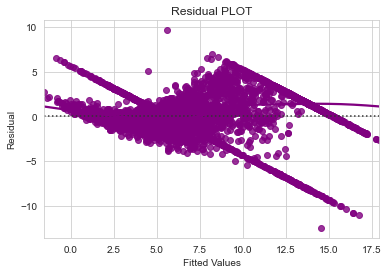

In [106]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

***Observations***
- Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects. No pattern in residual hence 1st assumptions is satisfied

### 3. Test For Normality 

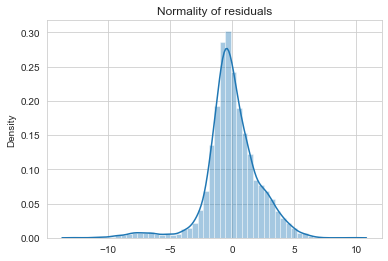

In [107]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

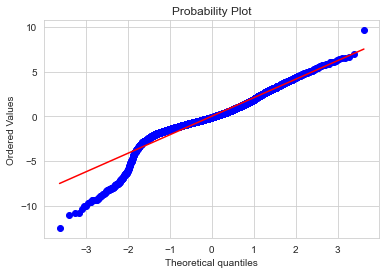

In [108]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [109]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9295129776000977, pvalue=5.731310719088502e-43)

***Observations***
* The residuals are not normal as per shapiro test (p-value < 0.05 to not be normal), but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal

### Test For Homoscedasticity
* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

1. Null hypothesis : Residuals are homoscedastic
2. Alternate hypothesis : Residuals have hetroscedasticity

In [110]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train3)
lzip(name, test)

[('F statistic', 0.9953267680260108), ('p-value', 0.5454102475862357)]

***Observations***
- Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data

### Predicting on the test data

In [111]:
X_train3.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Name_BMW',
       'Name_Bentley', 'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat',
       'Name_Force', 'Name_Ford', 'Name_Hindustan', 'Name_Honda',
       'Name_Hyundai', 'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep', 'Name_Land',
       'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini',
       'Name_Mitsubishi', 'Name_Nissan', 'Name_OpelCorsa', 'Name_Porsche',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Seats_5.0', 'Seats_7.0', 'Seats_8.0'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [112]:
X_test_final = X_test[X_train3.columns]

In [113]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Hindustan,Name_Honda,Name_Hyundai,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_OpelCorsa,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Seats_5.0,Seats_7.0,Seats_8.0
5473,1.0,2009,65000,17.50,70.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0
867,1.0,2010,41650,11.50,171.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
3441,1.0,2015,26256,20.14,88.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1502,1.0,2011,40000,11.74,186.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0
5182,1.0,2014,41000,17.00,139.07,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [114]:
y_pred = olsres2.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [115]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.15213204712247
Test error: 2.273043739900819


***Observations***
- Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting
- Hence we can conclude the model "olsres2" is good for prediction as well as inference purpose

In [116]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     282.3
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:55:02   Log-Likelihood:                -10577.
No. Observations:                4840   AIC:                         2.125e+04
Df Residuals:                    4791   BIC:                         2.157e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -849.3221    

***Observations***
* Now this is our final model which follows all the assumptions and this can be used for interpretations

1. 1 unit increase of the used car manufacture year adds 0.43 Lakh in the Price
2. Kilometers_Driven does not have too much effect on the Price
3. 1 unit increase of Mileage will decrease 0.1056 Lakh in the Price
4. 1 unit increase in Power (bhp) will increase 0.0327 in the Price
5. Some car brand names seem to have a positive impact on Price:
    - Bentley, Force, Hindustan, Jeep, Land Rover, Mercedes-Benz, Mini, OpelCorsa
6. Some locations have a positive impact on Price:
    - Bangalore, Coimbatore, Hyderabad
7. Locations with negative impact on Price top 3:
    - Kolkata, Delhi, Mumbai
8. Negative coefficients of Fuel_Type_Petrol and Transmission_Manual suggest Prices are higher for Diesel and Automatic Transmission cars
9. Used cars owned by only 1 owner has higher upside to Price compared to cars with 2 previous owners

## Forward Feature Selection 

* **Forward feature selection starts with an empty model and adds in variables one by one.**

* In each forward step, you add the one variable that gives the single best improvement to your model.

In [117]:
X_train_new = X_train3.drop('const', axis = 1)

* We'll use forward feature selection on variables, we received after removing multicollinearity
* Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [118]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [119]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 24,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished

[2021-05-17 00:55:03] Features: 1/24 -- score: 0.543819253553657[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.0s finished

[2021-05-17 00:55:04] Features: 2/24 -- score: 0.6589041053749731[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.0s finished

[2021-05-17 00:55:05] Features: 3/24 -- score: 0.6735900778540092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

***Observations***
* All 24 features are important since the final score is the highest

In [120]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 10, 12, 13, 17, 18, 20, 21, 23, 26, 28, 29, 30, 34, 36, 39, 42, 43, 46]


In [121]:
X_train3.columns[feat_cols]

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Name_Bentley', 'Name_Force', 'Name_Hindustan', 'Name_Honda',
       'Name_Jeep', 'Name_Land', 'Name_Maruti', 'Name_Mercedes-Benz',
       'Name_Mitsubishi', 'Name_Porsche', 'Name_Skoda', 'Name_Tata',
       'Name_Toyota', 'Location_Chennai', 'Location_Delhi', 'Location_Kochi',
       'Location_Pune', 'Fuel_Type_Petrol', 'Seats_5.0'],
      dtype='object')

In [122]:
X_train_final = X_train3[X_train3.columns[feat_cols]]

In [123]:
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Name_BMW', 'Name_Bentley', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Hindustan', 'Name_Honda',
       'Name_Hyundai', 'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep', 'Name_Land',
       'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini',
       'Name_Mitsubishi', 'Name_Nissan', 'Name_OpelCorsa', 'Name_Porsche',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Seats_5.0', 'Seats_7.0', 'Seats_8.0'],
      dtype='object')

In [124]:
#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [125]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)

Intercept of the linear equation: [-863.6119055]

Coefficients of the equation are: [[ 0.00000000e+00  4.30580274e-01 -8.29853693e-06 -7.51579561e-02
   5.52811091e-02  4.73504169e+00  2.49623123e+00  3.48879117e+00
  -5.24881339e-01  1.02952781e+00  2.12113398e+00  3.07102061e-01
   1.44391640e+00 -9.69917645e-01 -9.26849824e-01 -1.27732827e-01
  -1.12387813e+00  1.47013001e+00 -6.50119623e-02 -4.03917735e-01
  -1.05716103e-01 -4.51466245e-02 -1.29647212e+00 -2.41319568e-01]]


In [126]:
# R2 Squared: on train and test
print('R^2 score on train data :', r2_score(y_train, predicted))
print('R^2 score on test data :', r2_score(y_test, pred))

R^2 score on train data : 0.7031225277979244
R^2 score on test data : 0.674941939906018


In [127]:
# RMSE on train and test data
print('RMSE on train data :', mean_squared_error(y_train, predicted)**0.5)
print('RMSE on test data :', mean_squared_error(y_test, pred)**0.5)

RMSE on train data : 2.294294705661098
RMSE on test data : 2.398978104006326


***Observations***
- Both $R^2$ and RMSE  shows that model fitted is satisfactory, has no overfitting and can be used for making predictions
- We can observe here, the results from 'olsres2' and 'linearegression' models are approximately the same, varies by 3-4%